# Projeto de análise exploratória de dados - efeitos do alcool 

### Amaury Ribeiro

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

Dataset:
https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

In [2]:
#data import

In [3]:
maths_course_data = pd.read_csv("data/Maths.csv")

In [4]:
port_course_data  = pd.read_csv("data/Portuguese.csv")

In [5]:
maths_course_data.shape

(395, 33)

In [6]:
maths_course_data.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,3,2,2,1,1,5,4,14,15,15
169,GP,F,16,U,GT3,T,4,4,health,health,...,4,4,2,1,1,3,0,14,14,14
182,GP,F,17,U,GT3,T,2,4,services,services,...,5,4,2,2,3,5,0,16,17,17
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
272,GP,F,18,U,LE3,T,1,1,other,other,...,4,4,3,1,1,3,2,11,11,11


In [7]:
port_course_data.sample(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,16,11,11,10
369,GP,F,19,U,GT3,T,1,1,other,other,...,1,5,5,4,3,5,12,10,10,11
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,4,10,9,9
217,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13


### primeiro analise das duas bases de dados

In [8]:
current_df = pd.concat([maths_course_data, port_course_data], ignore_index=True, sort=False)

In [9]:
current_df.shape

(1044, 33)

In [10]:
current_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
columns = current_df.columns
columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
current_df.isnull().sum() #sem valores vazios

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
current_df.sex.unique()  # verificando se não existem sexos inválidos

array(['F', 'M'], dtype=object)

In [14]:
current_df.loc[ (current_df.age < 0)] #verificando valores inválidos

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


- manipulação em uma nova cópia para manter uma original caso queria voltar ao padrão (não recomendado para datasets grandes)

In [15]:
df = current_df.copy()

In [16]:
df.Dalc.describe

<bound method NDFrame.describe of 0       1
1       1
2       2
3       1
4       1
       ..
1039    1
1040    1
1041    1
1042    3
1043    3
Name: Dalc, Length: 1044, dtype: int64>

In [17]:
values = np.sort(df['Dalc'].unique())
values

array([1, 2, 3, 4, 5], dtype=int64)

In [18]:
labels_consumo_alcool = ['Muito Baixo', 'Baixo', 'Moderado', 'Alto', 'Muito Alto'] #variavéis categoricas texto

for i in values:
    df['Dalc'].replace({i: labels_consumo_alcool[i-1]}, regex=True, inplace=True)
    df['Walc'].replace({i: labels_consumo_alcool[i-1]}, regex=True, inplace=True)

In [19]:
df['Dalc'].unique()

array(['Muito Baixo', 'Baixo', 'Muito Alto', 'Moderado', 'Alto'],
      dtype=object)

## Idade

In [20]:
menores = df.loc[ (df.age < 18)]
maiores = df.loc[ (df.age >= 18)]

In [21]:
menores['Dalc'].value_counts()[labels_consumo_alcool], maiores['Dalc'].value_counts()[labels_consumo_alcool]

(Muito Baixo    533
 Baixo          145
 Moderado        46
 Alto            12
 Muito Alto      16
 Name: Dalc, dtype: int64,
 Muito Baixo    194
 Baixo           51
 Moderado        23
 Alto            14
 Muito Alto      10
 Name: Dalc, dtype: int64)

In [22]:
def obter_proporcoes(array):  
    total = array.sum()
    proporcoes = [(np.round(x/total,3)) for x in array]
    return proporcoes

In [23]:
maiores_dalc = maiores['Dalc'].value_counts()[labels_consumo_alcool]

proporcao_maiores_dalc = obter_proporcoes(maiores_dalc)
proporcao_maiores_dalc

[0.664, 0.175, 0.079, 0.048, 0.034]

In [24]:
menores_dalc = menores['Dalc'].value_counts()[labels_consumo_alcool]

proporcao_menores_dalc = obter_proporcoes(menores_dalc)
proporcao_menores_dalc

[0.709, 0.193, 0.061, 0.016, 0.021]

- maior presença de estudantes com consumo de álcool diário baixo em menores de idade quando comparados com adultos

Text(0.5, 1.0, 'Maiores de idade')

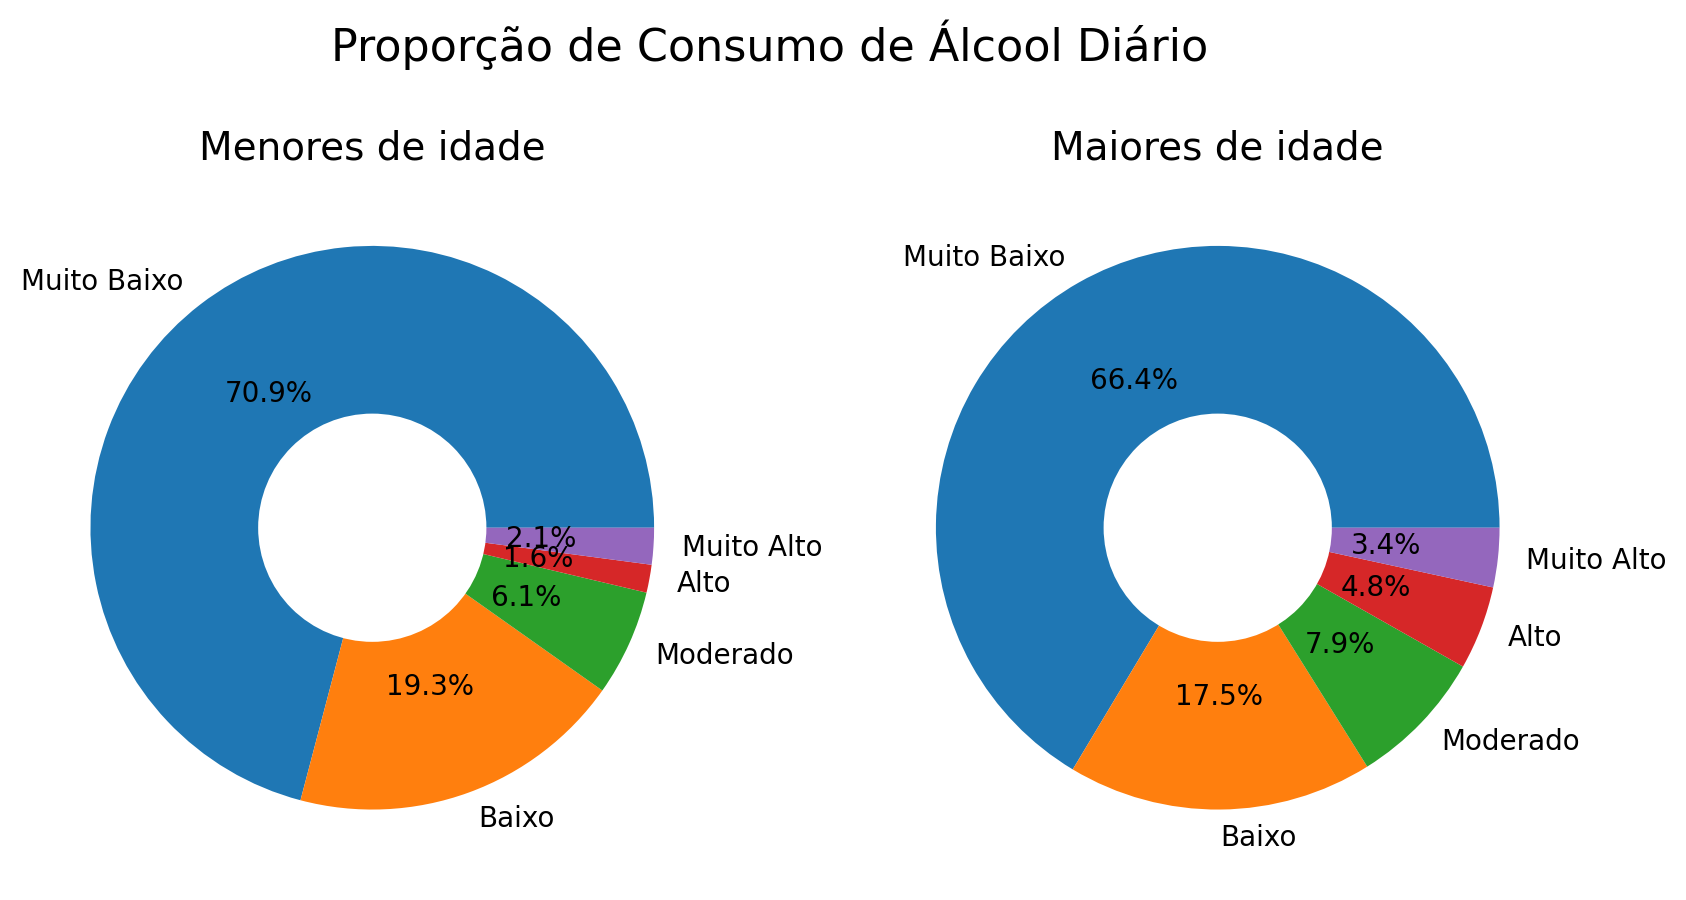

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=200)
fig.subplots_adjust(top=1.2)
fig.suptitle("Proporção de Consumo de Álcool Diário", fontsize= 16,)
axes[0].pie(proporcao_menores_dalc, labels= menores_dalc.index, autopct='%1.1f%%')
axes[1].pie(proporcao_maiores_dalc, labels= maiores_dalc.index, autopct='%1.1f%%')
my_circle = plt.Circle( (0,0), 0.4, color='white')
axes[0].add_patch(my_circle)
my_circle2 = plt.Circle( (0,0), 0.4, color='white')
axes[1].add_patch(my_circle2)
axes[0].set_title("Menores de idade", fontsize= 14)
axes[1].set_title("Maiores de idade", fontsize= 14)
#fig.savefig("idade_consumo_diario.png")

In [26]:
menores['Walc'].value_counts()[labels_consumo_alcool], maiores['Walc'].value_counts()[labels_consumo_alcool]

(Muito Baixo    294
 Baixo          169
 Moderado       141
 Alto            96
 Muito Alto      52
 Name: Walc, dtype: int64,
 Muito Baixo    104
 Baixo           66
 Moderado        59
 Alto            42
 Muito Alto      21
 Name: Walc, dtype: int64)

In [27]:
maiores_walc = maiores['Walc'].value_counts()[labels_consumo_alcool]
proporcao_maiores_walc = obter_proporcoes(maiores_walc)

menores_walc = menores['Walc'].value_counts()[labels_consumo_alcool]
proporcao_menores_walc = obter_proporcoes(menores_walc)

proporcao_maiores_walc, proporcao_menores_walc

([0.356, 0.226, 0.202, 0.144, 0.072], [0.391, 0.225, 0.188, 0.128, 0.069])

- não houveram mudanças grandes ao analisar o consumo semanal

Text(0.5, 1.0, 'Maiores de idade')

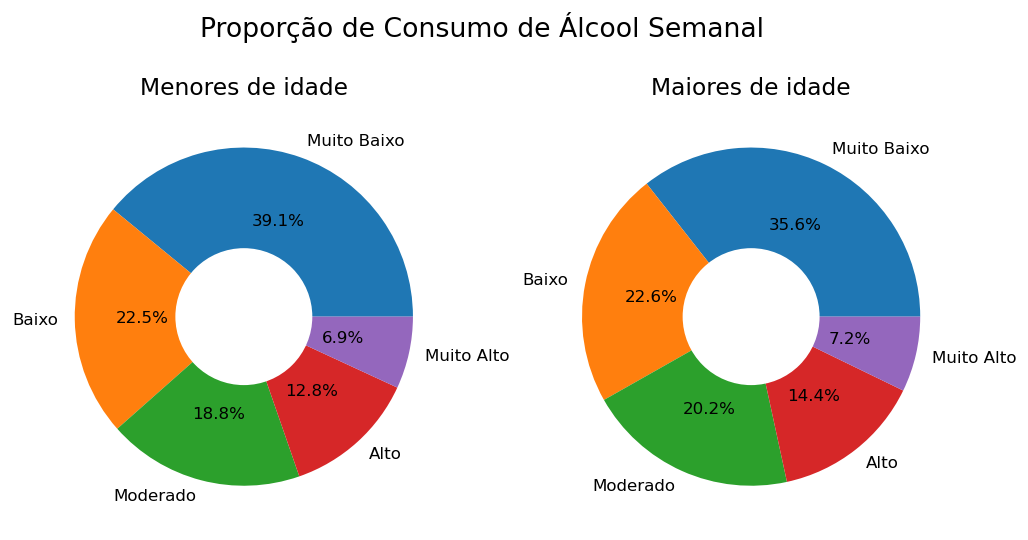

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=120)
fig.subplots_adjust(top=1.2)
fig.suptitle("Proporção de Consumo de Álcool Semanal", fontsize= 16,)
axes[0].pie(proporcao_menores_walc, labels= menores_walc.index, autopct='%1.1f%%')
axes[1].pie(proporcao_maiores_walc, labels= maiores_walc.index, autopct='%1.1f%%')
my_circle = plt.Circle( (0,0), 0.4, color='white')
axes[0].add_patch(my_circle)
my_circle2 = plt.Circle( (0,0), 0.4, color='white')
axes[1].add_patch(my_circle2)
axes[0].set_title("Menores de idade", fontsize= 14)
axes[1].set_title("Maiores de idade", fontsize= 14)
#fig.savefig("idade_consumo_mensal.png")

## Sexo

In [29]:
homens = df.loc[ (df.sex == 'M')]
mulheres = df.loc[ (df.sex == 'F')]

In [30]:
homens['Walc'].value_counts()[labels_consumo_alcool], mulheres['Walc'].value_counts()[labels_consumo_alcool]

(Muito Baixo    128
 Baixo           85
 Moderado        84
 Alto            94
 Muito Alto      62
 Name: Walc, dtype: int64,
 Muito Baixo    270
 Baixo          150
 Moderado       116
 Alto            44
 Muito Alto      11
 Name: Walc, dtype: int64)

In [31]:
homens_walc = homens['Walc'].value_counts()[labels_consumo_alcool]
mulheres_walc = mulheres['Walc'].value_counts()[labels_consumo_alcool]

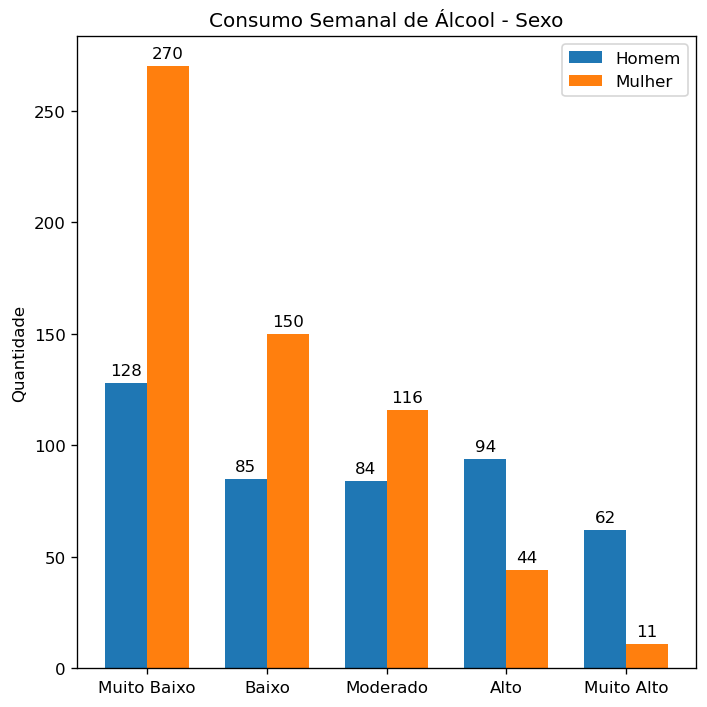

In [62]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
x = np.arange(len(labels_consumo_alcool))
width = 0.35 

rects1 = ax.bar(x - width/2, homens_walc, width, label='Homem')
rects2 = ax.bar(x + width/2, mulheres_walc, width, label='Mulher')

ax.set_ylabel('Quantidade')
ax.set_title('Consumo Semanal de Álcool - Sexo')
ax.set_xticks(x, labels_consumo_alcool)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
#fig.savefig("consumo_sexo_semanal.png")

In [33]:
homens_dalc = homens['Dalc'].value_counts()[labels_consumo_alcool]
mulheres_dalc = mulheres['Dalc'].value_counts()[labels_consumo_alcool]

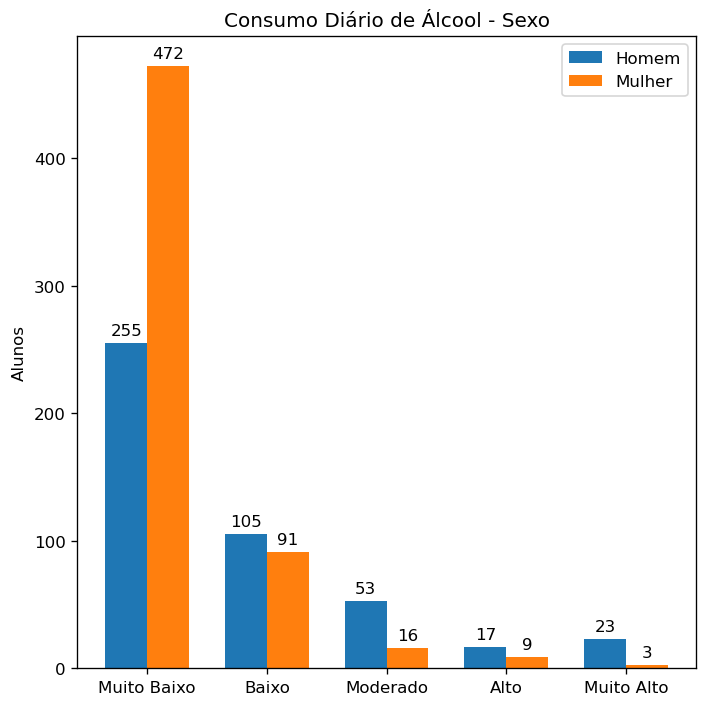

In [61]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
x = np.arange(len(labels_consumo_alcool))
width = 0.35 

rects1 = ax.bar(x - width/2, homens_dalc, width, label='Homem')
rects2 = ax.bar(x + width/2, mulheres_dalc, width, label='Mulher')

ax.set_ylabel('Alunos')
ax.set_title('Consumo Diário de Álcool - Sexo')
ax.set_xticks(x, labels_consumo_alcool)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
#fig.savefig("consumo_sexo_diario.png")

## Guarda

In [35]:
df.guardian.value_counts()

mother    728
father    243
other      73
Name: guardian, dtype: int64

In [36]:
father = df.loc[ (df.guardian == 'father')]
mother = df.loc[ (df.guardian == 'mother')]
other = df.loc[ (df.guardian == 'other')]
father_walc = father['Walc'].value_counts()[labels_consumo_alcool]
mother_walc = mother['Walc'].value_counts()[labels_consumo_alcool]
other_walc = other['Walc'].value_counts()[labels_consumo_alcool]

(nenhum insight interessante nesse grafico...)

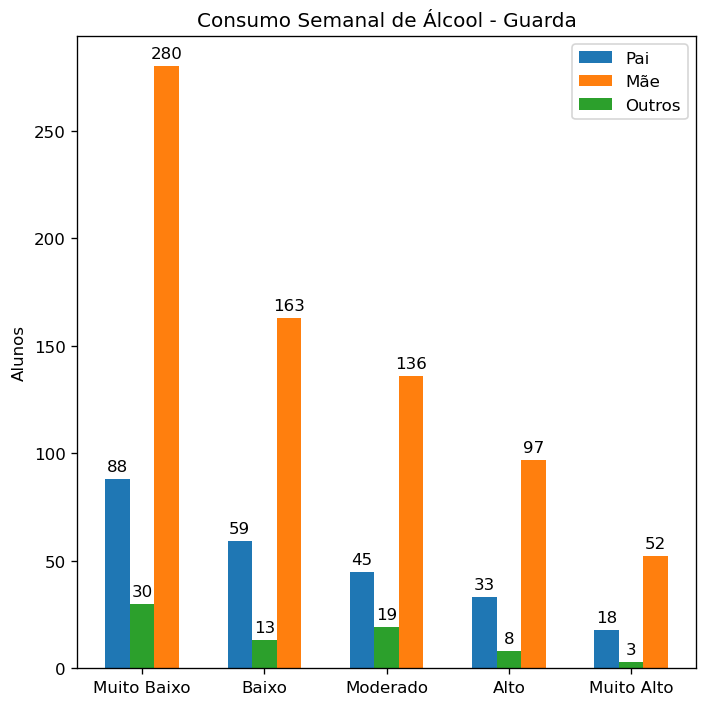

In [60]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
x = np.arange(len(labels_consumo_alcool))
width = 0.20

rects1 = ax.bar(x - width, father_walc, width, label='Pai')
rects2 = ax.bar(x + width, mother_walc, width, label='Mãe')
rects3 = ax.bar(x, other_walc, width, label='Outros')

ax.set_ylabel('Alunos')
ax.set_title('Consumo Semanal de Álcool - Guarda')
ax.set_xticks(x, labels_consumo_alcool)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

## Reprovações

In [38]:
df.failures.value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

In [40]:
f1 = df.loc[ (df.failures == 1)]
f2 = df.loc[ (df.failures == 2)]
f3 = df.loc[ (df.failures == 3)]
f0 = df.loc[ (df.failures == 0)]

In [41]:
f3_valores = f3['Dalc'].value_counts() #preciso iajustar
temp = f3_valores['Moderado']
f3_valores['Moderado'] = f3_valores.pop('Muito Alto')
f3_valores['Alto'] = 0
f3_valores['Muito Alto'] = temp
f3_valores

Muito Baixo    18
Baixo           6
Moderado        3
Alto            0
Muito Alto      3
Name: Dalc, dtype: int64

In [55]:

f1dalc = f1['Dalc'].value_counts()[labels_consumo_alcool]
f2dalc = f2['Dalc'].value_counts()[labels_consumo_alcool]
f3dalc = f3_valores
f0dalc = f0['Dalc'].value_counts()[labels_consumo_alcool]

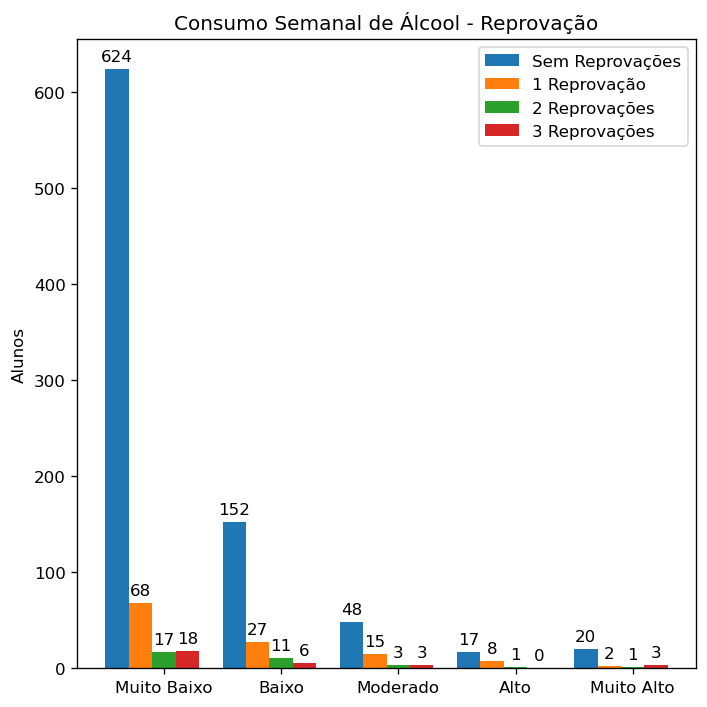

In [58]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
x = np.arange(len(labels_consumo_alcool))
width = 0.20

rects1 = ax.bar(x - 2*width, f0dalc, width, label='Sem Reprovações')
rects2 = ax.bar(x - width, f1dalc, width, label='1 Reprovação')
rects3 = ax.bar(x, f2dalc, width, label='2 Reprovações')
rects4 = ax.bar(x + width, f3dalc, width, label='3 Reprovações')

ax.set_ylabel('Alunos')
ax.set_title('Consumo Semanal de Álcool - Reprovação')
ax.set_xticks(x, labels_consumo_alcool)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()
#fig.savefig("consumo_reprovacoes.png")

### Relacionamento

In [44]:
df.romantic.value_counts()

no     673
yes    371
Name: romantic, dtype: int64

In [45]:
relation = df.loc[ (df.romantic == 'yes')]
singler = df.loc[ (df.romantic == 'no')]
relation_dalc = relation['Dalc'].value_counts()[labels_consumo_alcool]
singler_dalc = singler['Dalc'].value_counts()[labels_consumo_alcool]

In [46]:
relation_dalc_prop = obter_proporcoes(relation_dalc)
singler_dalc_prop = obter_proporcoes(singler_dalc)

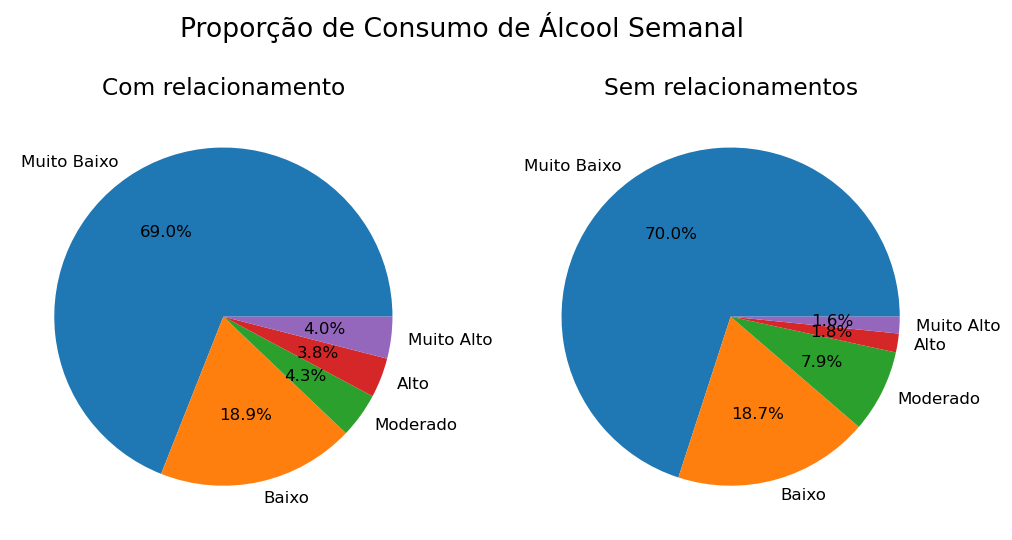

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=120)
fig.subplots_adjust(top=1.2)
fig.suptitle("Proporção de Consumo de Álcool Semanal", fontsize= 16,)
axes[0].pie(relation_dalc_prop, labels= relation_dalc.index, autopct='%1.1f%%')
axes[1].pie(singler_dalc_prop, labels= singler_dalc.index, autopct='%1.1f%%')
axes[0].set_title("Com relacionamento", fontsize= 14)
axes[1].set_title("Sem relacionamentos", fontsize= 14)
#fig.savefig("relacionamento_consumo_mensal.png")

In [49]:
df.reason.value_counts()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

In [50]:
course = df.loc[ (df.reason == 'course')]
home = df.loc[ (df.reason == 'home')]
reputation = df.loc[ (df.reason == 'reputation')]
other = df.loc[ (df.reason == 'other')]

In [51]:
course_dalc = course['Dalc'].value_counts()[labels_consumo_alcool]
home_dalc = home['Dalc'].value_counts()[labels_consumo_alcool]
reputation_dalc = reputation['Dalc'].value_counts()[labels_consumo_alcool]
other_dalc = other['Dalc'].value_counts()[labels_consumo_alcool]

- alunos que estudam pelo curso tem consumo menor, para confirmar esse observação, será criado o gráfico de proporções

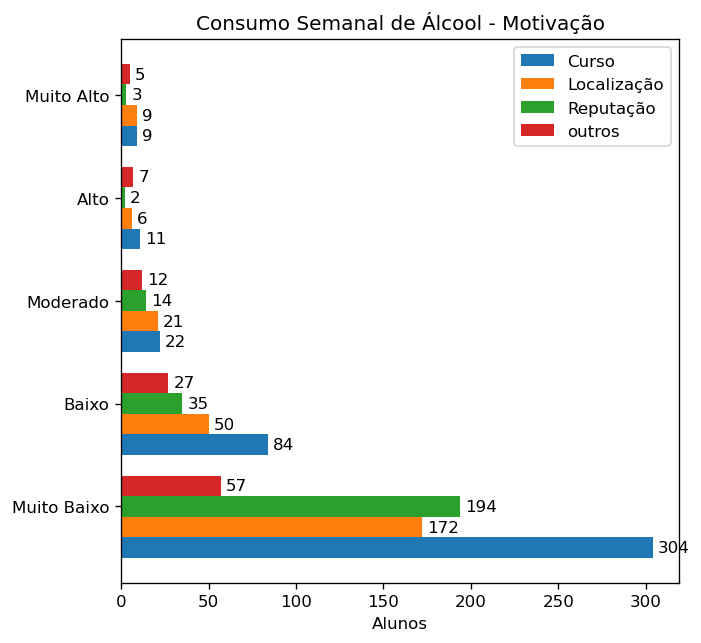

In [65]:
ig, ax = plt.subplots(figsize=(6, 6), dpi=120)
x = np.arange(len(labels_consumo_alcool))
width = 0.20

rects1 = ax.barh(x - 2*width, course_dalc, width, label='Curso')
rects2 = ax.barh(x - width, home_dalc, width, label='Localização')
rects3 = ax.barh(x, reputation_dalc, width , label='Reputação')
rects4 = ax.barh(x + width, other_dalc, width, label='outros')

ax.set_xlabel('Alunos')
ax.set_title('Consumo Diario de Álcool - Motivação')
ax.set_yticks(x, labels_consumo_alcool)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()

In [69]:
course_dalc_prop = obter_proporcoes(course_dalc)
home_dalc_prop = obter_proporcoes(home_dalc)
reputation_dalc_prop = obter_proporcoes(reputation_dalc)
other_dalc_prop = obter_proporcoes(other_dalc)

- Ao analisar as porporções a suposição é confirmada, há mais estudandes com baixo consumo de álcool uma vez que estão motivados pelo curso ou pela reputação da escola em comparação com os estudantes que estão estudando por estarem perto do colégio ou outros motivos.

In [108]:
from matplotlib import colors 

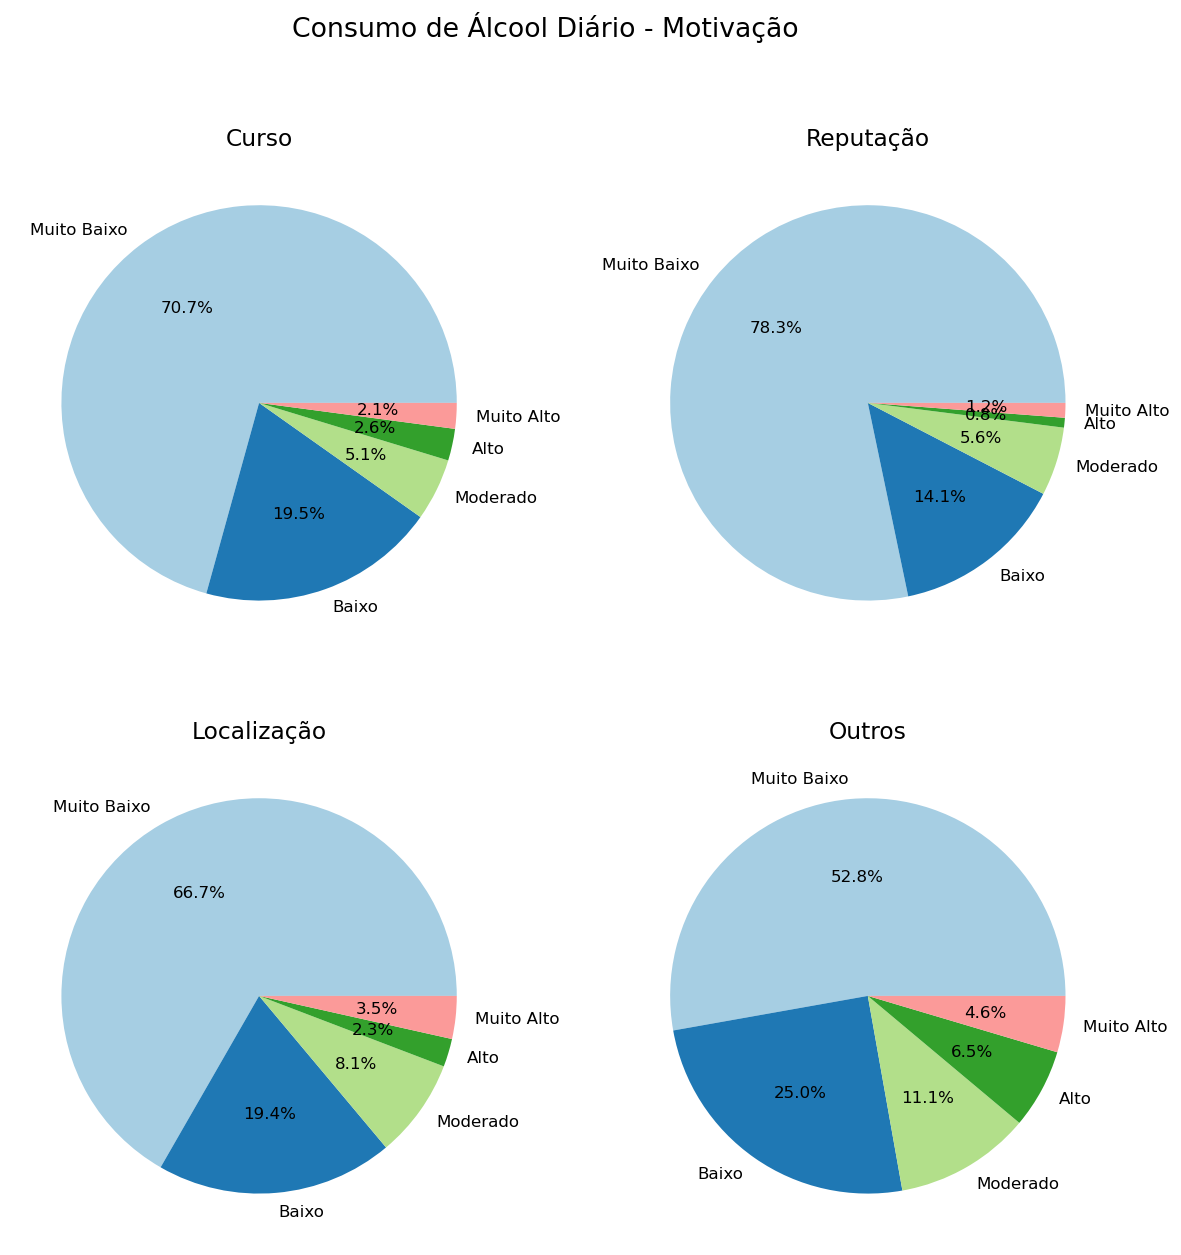

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=120)
cmap = plt.get_cmap('Paired')
fig.suptitle("Consumo de Álcool Diário - Motivação", fontsize= 16,)
axes[0][0].pie(course_dalc_prop, labels= course_dalc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[0][1].pie(reputation_dalc_prop, labels= reputation_dalc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[1][0].pie(home_dalc_prop, labels= home_dalc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[1][1].pie(other_dalc_prop, labels= other_dalc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[0][0].set_title("Curso", fontsize= 14)
axes[0][1].set_title("Reputação", fontsize= 14)
axes[1][0].set_title("Localização", fontsize= 14)
axes[1][1].set_title("Outros", fontsize= 14)
fig.savefig("proporcao_consumo_motivacao.png")

In [140]:
course_walc = course['Walc'].value_counts()[labels_consumo_alcool]
home_walc = home['Walc'].value_counts()[labels_consumo_alcool]
reputation_walc = reputation['Walc'].value_counts()[labels_consumo_alcool]
other_wdalc = other['Walc'].value_counts()[labels_consumo_alcool]
course_walc_prop = obter_proporcoes(course_walc)
home_walc_prop = obter_proporcoes(home_walc)
reputation_walc_prop = obter_proporcoes(reputation_walc)
other_walc_prop = obter_proporcoes(other_walc)

- ao analisar o consumo semanal, percebe-se que são mais próximos do que o consumo diário, talvez isso se deve ao fato de que alunos mais motivados estão mais focados durante a jornada de estudo e deixam o consumo para os fins de semana.

Text(0.5, 1.0, 'Outros')

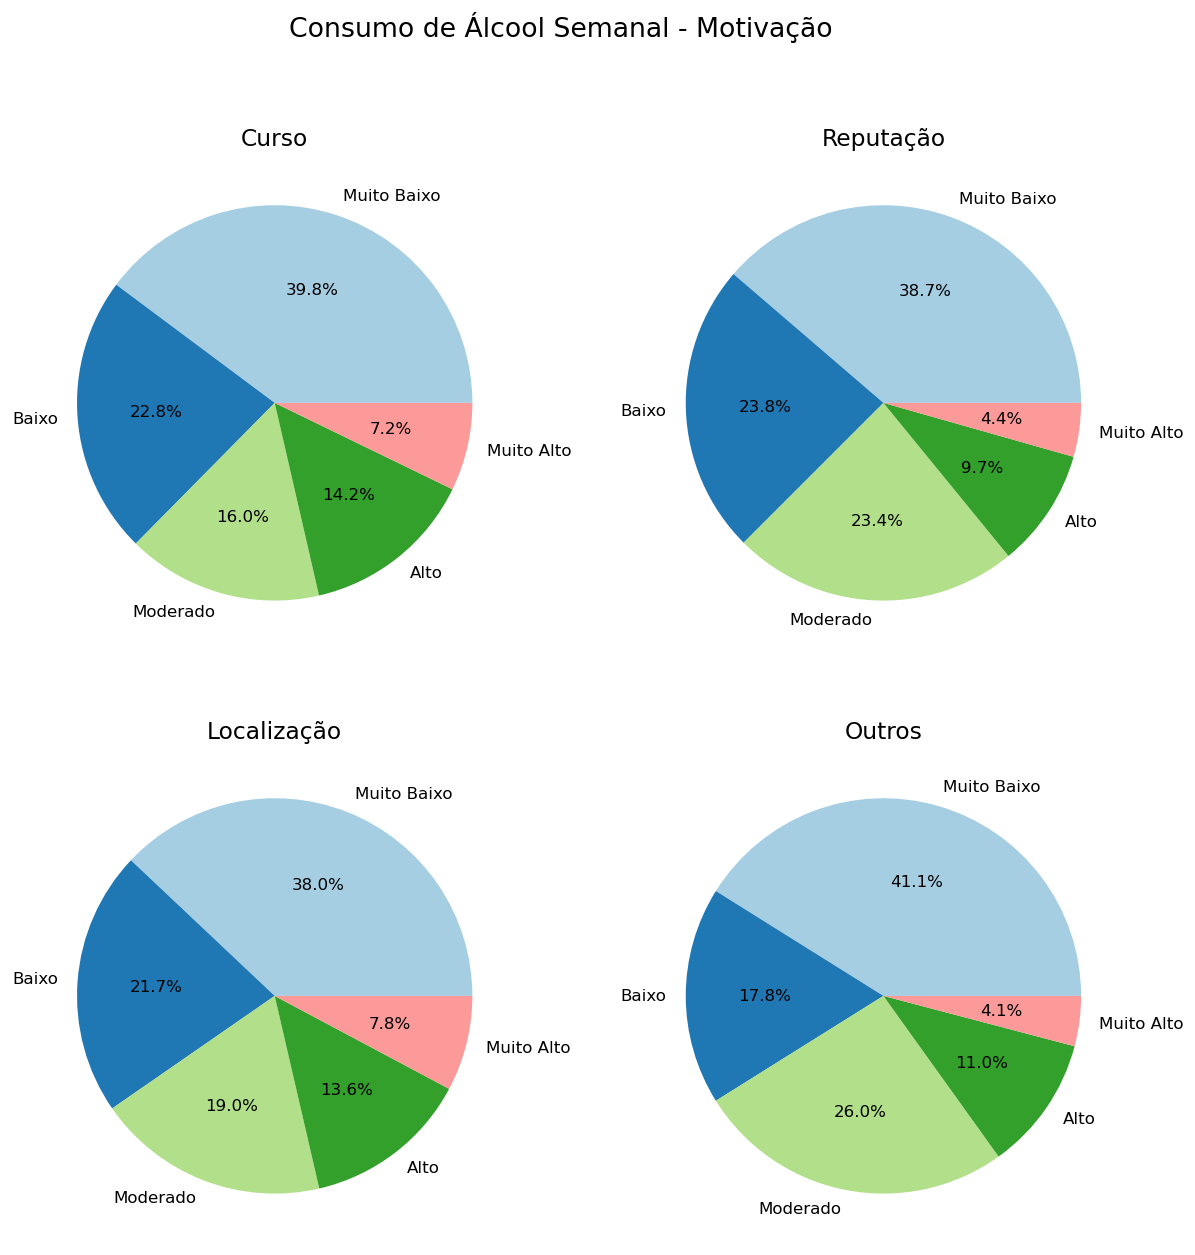

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=120)
cmap = plt.get_cmap('Paired')
fig.suptitle("Consumo de Álcool Semanal - Motivação", fontsize= 16,)
axes[0][0].pie(course_walc_prop, labels= course_walc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[0][1].pie(reputation_walc_prop, labels= reputation_walc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[1][0].pie(home_walc_prop, labels= home_walc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[1][1].pie(other_walc_prop, labels= other_walc.index, autopct='%1.1f%%', colors=cmap.colors)
axes[0][0].set_title("Curso", fontsize= 14)
axes[0][1].set_title("Reputação", fontsize= 14)
axes[1][0].set_title("Localização", fontsize= 14)
axes[1][1].set_title("Outros", fontsize= 14)
#fig.savefig("proporcao_consumo_motivacao_semanal.png")

In [ ]:
df.columns

In [ ]:
'''fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(maiores['Dalc'].value_counts().index, proporcao_maiores, color = ['blue'], label='Maiores de idade')
ax.barh(menores['Dalc'].value_counts().index, proporcao_menores, color = ['lightblue'], label='Menores de idade')
plt.ylabel("legenday", fontsize=14, labelpad= 10) 
plt.legend()
plt.grid(True) #grade 
plt.title("Variação dos consumo de alcool por menores de idade", fontsize=18, pad=10)'''